In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch 
import matplotlib.pyplot as plt

In [3]:
import ipywidgets as widgets

In [4]:
def f(o): print('hi')

In [5]:
w = widgets.Button(description='click me')

In [6]:
w

Button(description='click me', style=ButtonStyle())

In [7]:
w.on_click(f)

In this case f is a callback, where we are passing a function to the on_click method, events are considered a kind of callback, a callback can be viewed as a function pointer

In [8]:
w

Button(description='click me', style=ButtonStyle())

hi
hi


### Creating your own callback

In [9]:
from time import sleep

In [10]:
def slow_calc(cb=None):
    res = 0
    for i in range(3):
        res += i*i
        sleep(1)
        if cb: cb(i)
    return res

In [11]:
def show_progress(e):
    print(f"epoch {e} has been completed")

In [12]:
slow_calc(show_progress)

epoch 0 has been completed
epoch 1 has been completed
epoch 2 has been completed


5

### Lambdas and partials

Notice that the arguments come before the ":"

In [14]:
slow_calc(lambda o: print(f"epoch {o} has been completed!"))

epoch 0 has been completed!
epoch 1 has been completed!
epoch 2 has been completed!


5

In [15]:
def show_progress(expression, e):
    print(f'{expression} epoch no {e} has been completed')

In [16]:
slow_calc(lambda o: show_progress('Damn!!', o))

Damn!! epoch no 0 has been completed
Damn!! epoch no 1 has been completed
Damn!! epoch no 2 has been completed


5

In [19]:
def make_show_progress(expression):
    _inner = lambda e: print(f"{expression} epoch no {e} has been completed")
    return _inner

In [21]:
slow_calc(make_show_progress('Huh!'))

Huh! epoch no 0 has been completed
Huh! epoch no 1 has been completed
Huh! epoch no 2 has been completed


5

Classes can be callbacks too!

One thing we can do is add __call__ to the class to make the instance callable , if need be with params

### Vim Notes

Jump to symbol e.g. class or function `:tag create_` + tab (loops through matching strings) + ENTER

ctrl + ] , takes user to definition of the symbol you clicked on

VIM allows for folding or outlining - may be worth looking at this

ctrl + t , takes you to the most recent tag

:Ack lambda , will provide a list of all the places where lambda has been used



### Variance

Variance is the average of how far away each data point is from the mean. How much does the data vary.

In [22]:
t = torch.tensor([1.,2.,4.,18])

In [23]:
m = t.mean();m

tensor(6.2500)

In [25]:
(t-m).mean() # doesn't work because +ve and -ve values cancel each other out

tensor(0.)

In [26]:
(t-m).pow(2).mean()

tensor(47.1875)

In [27]:
# another way is to take the abs value
(t-m).abs().mean() # mean absolute deviation

tensor(5.8750)

Looking at the values shows that we need to take the root of the value we've squared, because the scale of the difference changes to dramatically

In [28]:
(t-m).pow(2).mean().sqrt() # a.k.a. standard deviation

tensor(6.8693)

The standard deviation is more sensitive to outliers, which makes the mean absolute deviation a more preferrable indicator of variance in the data.

<strong>Note to keep in mind</strong> abs values are often better to use than squared thingies. 

Squared thingies are more popular, because the math plays nicer with the proofs.

In [29]:
(t-m).pow(2).mean(), (t*t).mean() - (m*m) # are the same , the latter is a better implementation

(tensor(47.1875), tensor(47.1875))

### Covariance and correlation

In [30]:
t

tensor([ 1.,  2.,  4., 18.])

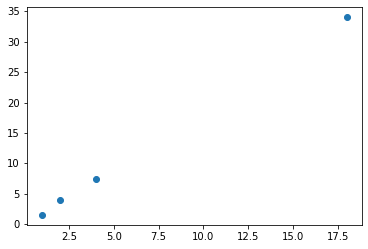

In [32]:
# u is twice t with some randomness
u = t*2
u *= torch.randn_like(t)/10+0.95

plt.scatter(t, u);

In [33]:
u

tensor([ 1.5541,  3.9287,  7.5093, 34.0040])